# Converting text to features

### Converting Text to Features Using One Hot Encoding

In [ ]:
# Importing the library 

import pandas as pd
Text ='I am learning NLP' 
# Generating the features
pd.get_dummies(Text.split())

,I,NLP,am,learning
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0


In [ ]:
from numpy import array
from numpy import argmax # The numpy. argmax() function returns indices of the max element of the array in a particular axis. 
#Syntax : numpy.argmax(array, axis = None, out = None)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot', 'rain', 'love']
values = array(data)
print(values)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)


['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot' 'rain'
 'love']
[0 0 4 0 1 1 4 0 4 1 3 2]
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]
['cold']


In [ ]:
from numpy import array
from numpy import argmax
from tensorflow.keras.utils import to_categorical

# define example
data = [1, 3, 2, 0, 3, 2, 2, 1, 0, 1]
#data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot', 'rain', 'love']


data = array(data)
print(data)

# one hot encode
encoded = to_categorical(data)
print(encoded)

# invert encoding
inverted = argmax(encoded[0])
print(inverted)

[1 3 2 0 3 2 2 1 0 1]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
1


### Converting Text to Features Using sklearn.feature_extraction.text

In [ ]:
#importing the function 

from sklearn.feature_extraction.text import CountVectorizer
# Countvector is simialr to encoding methods but it takes frequency under consideration. 

# Text
text = ["I love NLP and I will learn NLP in 2month "]

# create the transform
vectorizer = CountVectorizer()

# tokenizing
vectorizer.fit(text)

# encode document
vector = vectorizer.transform(text)

# summarize & generating output
print(vectorizer.vocabulary_)
print(vector.toarray())

{'love': 4, 'nlp': 5, 'and': 1, 'will': 6, 'learn': 3, 'in': 2, '2month': 0}
[[1 1 1 1 1 2 1]]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


# To create a Count Vectorizer, we simply need to instantiate one.
# There are special parameters we can set here when making the vectorizer, but
# for the most basic example, it is not needed.
vectorizer = CountVectorizer()

# For our text, we are going to take some text from our previous blog post
# about count vectorization
sample_text = ["One of the most basic ways we can numerically represent words "
               "is through the one-hot encoding method (also sometimes called "
               "count vectorizing)."]

# To actually create the vectorizer, we simply need to call fit on the text
# data that we wish to fix
vectorizer.fit(sample_text)

# Now, we can inspect how our vectorizer vectorized the text
# This will print out a list of words used, and their index in the vectors
print('Vocabulary: ')
print(vectorizer.vocabulary_)

# If we would like to actually create a vector, we can do so by passing the
# text into the vectorizer to get back counts
vector = vectorizer.transform(sample_text)

# Our final vector:
print('Full vector: ')
print(vector.toarray())

# Or if we wanted to get the vector for one word:
print('Hot vector: ')
print(vectorizer.transform(['hot']).toarray())

# Or if we wanted to get multiple vectors at once to build matrices
print('Hot and one: ')
print(vectorizer.transform(['hot', 'one']).toarray())

# We could also do the whole thing at once with the fit_transform method:
print('One swoop:')
new_text = ['Today is the day that I do the thing today, today']
new_vectorizer = CountVectorizer()
print(new_vectorizer.fit_transform(new_text).toarray())

Vocabulary: 
{'one': 12, 'of': 11, 'the': 15, 'most': 9, 'basic': 1, 'ways': 18, 'we': 19, 'can': 3, 'numerically': 10, 'represent': 13, 'words': 20, 'is': 7, 'through': 16, 'hot': 6, 'encoding': 5, 'method': 8, 'also': 0, 'sometimes': 14, 'called': 2, 'count': 4, 'vectorizing': 17}
Full vector: 
[[1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1]]
Hot vector: 
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Hot and one: 
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]]
One swoop:
[[1 1 1 1 2 1 3]]


In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',]

vectorizer = HashingVectorizer(n_features=2**4)
X = vectorizer.fit_transform(corpus)

print(X.shape)
X

(4, 16)


<4x16 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import numpy as np

corpus = ['this is the first document',
          'this document is the second document',
          'and this is the third one',
          'is this the first document']

vocabulary = ['this', 'document', 'first', 'is', 'second', 'the',
              'and', 'one']

pipe = Pipeline([('count', CountVectorizer(vocabulary=vocabulary)),
                 ('tfid', TfidfTransformer())]).fit(corpus)

pipe['count'].transform(corpus).toarray()


pipe['tfid'].idf_


pipe.transform(corpus).shape

(4, 8)

#### Difference in Counte Vector and TFIDF transformer 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names())

print(X.shape)

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
(4, 9)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Generating N-grams

In [ ]:
import nltk
nltk.download('punkt')

Text = "I am learning NLP today what about you?"

#Import textblob
from textblob import TextBlob

#For unigram : Use n = 1
TextBlob(Text).ngrams(1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[WordList(['I']),
 WordList(['am']),
 WordList(['learning']),
 WordList(['NLP']),
 WordList(['today']),
 WordList(['what']),
 WordList(['about']),
 WordList(['you'])]

In [ ]:
#For Bigram : For bigrams, use n = 2 
TextBlob(Text).ngrams(2)

[WordList(['I', 'am']),
 WordList(['am', 'learning']),
 WordList(['learning', 'NLP']),
 WordList(['NLP', 'today']),
 WordList(['today', 'what']),
 WordList(['what', 'about']),
 WordList(['about', 'you'])]

In [ ]:
#For Trigram : use n = 2 
TextBlob(Text).ngrams(3)

[WordList(['I', 'am', 'learning']),
 WordList(['am', 'learning', 'NLP']),
 WordList(['learning', 'NLP', 'today']),
 WordList(['NLP', 'today', 'what']),
 WordList(['today', 'what', 'about']),
 WordList(['what', 'about', 'you'])]

In [ ]:
#importing the function 
from sklearn.feature_extraction.text import CountVectorizer

# Text
text = ["I love NLP and I will learn NLP in 2month "]

# create the transform
vectorizer = CountVectorizer(ngram_range=(2,2))

# tokenizing
vectorizer.fit(text)

# encode document
vector = vectorizer.transform(text)

# summarize & generating output
print(vectorizer.vocabulary_)
print(vector.toarray())

{'love nlp': 3, 'nlp and': 4, 'and will': 0, 'will learn': 6, 'learn nlp': 2, 'nlp in': 5, 'in 2month': 1}
[[1 1 1 1 1 1 1]]


In [ ]:
import numpy as np 
import nltk
from nltk import bigrams    
import itertools

def co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    
    vocab_to_index = { word:i for i, word in enumerate(vocab) }
    
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
    
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
    
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))

    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_to_index[current]
        pos_previous = vocab_to_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count 
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
    
    # return the matrix and the index
    return co_occurrence_matrix,vocab_to_index

In [ ]:
# sentences for testing 
sentences = [['I', 'love', 'nlp'],
['I', 'love','to' 'learn'],
['nlp', 'is', 'future'],
['nlp', 'is', 'cool']]

# create one list using many lists
merged = list(itertools.chain.from_iterable(sentences))
matrix = co_occurrence_matrix(merged)


# generate the matrix
CoMatrixFinal = pd.DataFrame(matrix[0], index=vocab_to_index, columns=vocab_to_index)
print(CoMatrixFinal)

### Hashing Vectorizer

In [ ]:
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]

# Transform
vectorizer = HashingVectorizer(n_features=10)

# create the hashing vector
vector = vectorizer.transform(text)

# summarize the vector
print(vector.shape)
print(vector.toarray()) 

(1, 10)
[[ 0.          0.57735027  0.          0.          0.          0.
   0.         -0.57735027 -0.57735027  0.        ]]


### TF-IDF

In [ ]:
Text = ["The quick brown fox jumped over the lazy dog.",
"The dog.",
"The fox"]

#Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Create the transform
vectorizer = TfidfVectorizer()

#Tokenize and build vocab
vectorizer.fit(Text)

#Summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]


### Word Embeddings

In [ ]:
sentences = [['I', 'love', 'nlp'],
			['I', 'will', 'learn', 'nlp', 'in', '2','months'],
			['nlp', 'is', 'future'],
			['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
			['nlp', 'uses', 'machine', 'learning']]


#import library 
#!pip install gensim

import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# training the model
skipgram = Word2Vec(sentences, window = 3, min_count=1,sg = 1)
print(skipgram)

# access vector for one word
print(skipgram['nlp'])

In [ ]:
# save model
skipgram.save('skipgram.bin')

# load model
skipgram = Word2Vec.load('skipgram.bin')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


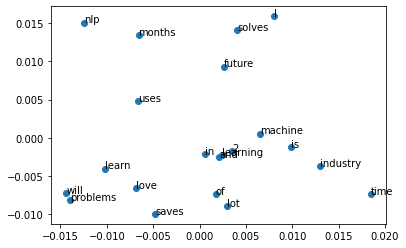

In [ ]:
# T – SNE plot 
X = skipgram[skipgram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection

pyplot.scatter(result[:, 0], result[:, 1])
words = list(skipgram.wv.vocab)

for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

pyplot.show() 

### Continuous Bag of Words (CBOW)

In [ ]:
#import library 
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

#Example sentences
sentences = [['I', 'love', 'nlp'],
			['I', 'will', 'learn', 'nlp', 'in', '2','months'],
			['nlp', 'is', 'future'],
			['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
			['nlp', 'uses', 'machine', 'learning']]


# training the model
skipgram = Word2Vec(sentences, window = 3, min_count=1,sg = 1)
print(skipgram)

# access vector for one word
print(skipgram['nlp'])

# save model
skipgram.save('skipgram.bin')

# load model
skipgram = Word2Vec.load('skipgram.bin')

Word2Vec(vocab=21, size=100, alpha=0.025)
[ 3.7320987e-03 -8.8955997e-04 -3.9004406e-03 -3.5289917e-03
 -4.1046208e-03  1.0716738e-03 -4.8536430e-03  1.9884373e-03
  1.5886443e-03  4.8033921e-03 -4.7212387e-03 -3.3452141e-03
  4.0027145e-03  4.2948243e-03 -3.7946992e-03  3.4447184e-03
 -6.3989201e-04 -2.8653969e-03 -1.2114268e-03 -2.6874593e-03
  4.0761065e-03  2.4601091e-03 -4.7124620e-03  3.0477538e-03
  3.2380158e-03 -1.0767425e-03  4.7925706e-03  6.8209396e-05
  8.3102437e-04 -1.0852299e-03  3.6339380e-04  1.1632193e-03
  3.0278647e-03 -2.4702051e-03  1.1401932e-03  2.9847594e-03
  2.9983581e-03 -1.2008674e-03 -3.2807891e-03 -2.4227670e-03
  9.1370317e-04 -1.5460791e-03 -1.1818091e-03 -4.0935487e-03
 -2.3479804e-03  1.5057216e-03  4.9700108e-03  1.6424404e-03
 -4.9210517e-03  4.0410291e-03  4.8979260e-03 -1.4601364e-03
 -4.4118902e-03  5.7220453e-04  1.8298416e-03  2.8832851e-03
  2.5669942e-03 -7.1417954e-04  4.5105913e-03  3.4342795e-03
  1.9464286e-03  2.0362886e-03  4.8961840e-

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


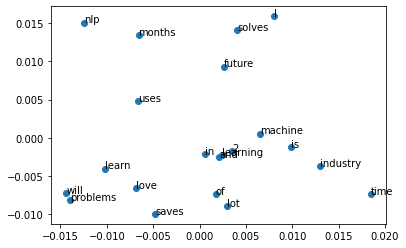

In [ ]:
# T – SNE plot 
X = skipgram[skipgram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(skipgram.wv.vocab)

for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

pyplot.show() 

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
cd ../gdrive/My Drive/Colab Notebooks/_NLP

/gdrive/My Drive/Colab Notebooks/_NLP


In [ ]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

vec_king = wv['king']

[=============================================-----] 91.7% 1525.3/1662.8MB downloaded

ConnectionResetError: ignored

In [ ]:
!pip install wget, gzip

import wget
url = 'https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz'
filename = wget.download(url)

f_in = gzip.open('GoogleNews-vectors-negative300.bin.gz', 'rb')
f_out = open('GoogleNews-vectors-negative300.bin', 'wb')
f_out.writelines(f_in)

import gensim
from gensim.models import Word2Vec, KeyedVectors
from sklearn.decomposition import PCA

model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True, limit=100000)

In [ ]:
# import gensim package
import gensim
from gensim import models
 
#Checking how similarity works. 
print (model.similarity('this', 'is'))

#Lets check one more.
print (model.similarity('post', 'book'))

# Finding the odd one out.
# model.doesnt_match('breakfast cereal dinner lunch',split())

# It is also finding the relations between words. 
word_vectors.most_similar(positive=['woman', 'king'], negative=['man'])

### Implementing FastText

In [ ]:
# Import FastText

from gensim.models import FastText
from sklearn.decomposition import PCA
from matplotlib import pyplot

#Example sentences

sentences = [['I', 'love', 'nlp'],
			['I', 'will', 'learn', 'nlp', 'in', '2','months'],
			['nlp', 'is', 'future'],
			['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
			['nlp', 'uses', 'machine', 'learning']]


fast = FastText(sentences,vector_size=20, window=1, min_count=1, workers=5, min_n=1, max_n=2)

# vector for word nlp
#print(fast['nlp'])
print(fast)

FastText(vocab=21, vector_size=20, alpha=0.025)


In [ ]:
# load model

fast = Word2Vec.load('fast.bin')

# visualize 

X = skipgram[skipgram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)


# create a scatter plot of the projection

pyplot.scatter(result[:, 0], result[:, 1])
words = list(skipgram.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()
